# Import libraries for working with data.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

## Import data sets

In [2]:
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

In [3]:
#train_data.head()
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [4]:
#test_data.head()
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


# Dataset Feature Description

This dataset contains information about bank customers, with the goal of predicting customer churn. Each entry represents a customer, described by the following features:

- **CustomerId**: A unique identifier assigned to each customer.
- **Surname**: The customer's last name.
- **CreditScore**: A numerical value reflecting the customer’s creditworthiness.
- **Geography**: The country where the customer resides (France, Spain, or Germany).
- **Gender**: The customer's gender (Male or Female).
- **Age**: The customer's age in years.
- **Tenure**: Number of years the customer has been with the bank.
- **Balance**: The current balance in the customer’s account.
- **NumOfProducts**: The number of different banking products the customer is using.
- **HasCrCard**: Indicates whether the customer owns a credit card (1 = Yes, 0 = No).
- **IsActiveMember**: Indicates if the customer is an active account holder (1 = Yes, 0 = No).
- **EstimatedSalary**: An estimation of the customer’s annual income.
- **Exited**: Target variable; indicates whether the customer has left the bank (1 = Yes, 0 = No).

# Check for missing values

In [5]:
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### There are no missing values in train_data

In [6]:
test_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

#### There are no missing values in test_data

## Check The Duplicates

In [7]:
train_data.duplicated().sum()

np.int64(0)

In [8]:
test_data.duplicated().sum()

np.int64(0)

#### There are no duplicate values in both data sets

# Initial data analysis

## Dataset shape

In [9]:
train_data.shape

(165034, 14)

In [10]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


## Descriptive Analysis

In [11]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [12]:
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [13]:
categorical_cols

['Surname', 'Geography', 'Gender']

In [14]:
numerical_cols

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

# Data Visualization

<Axes: title={'center': 'Target variable distribution: Exited'}, xlabel='Exited'>

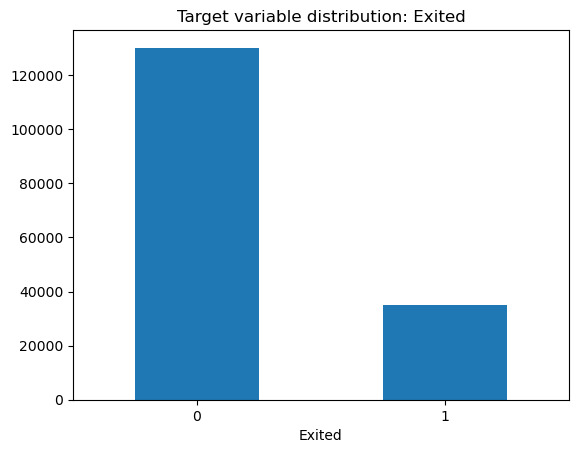

In [15]:
train_data['Exited'].value_counts().plot(kind='bar', title='Target variable distribution: Exited', rot=0)

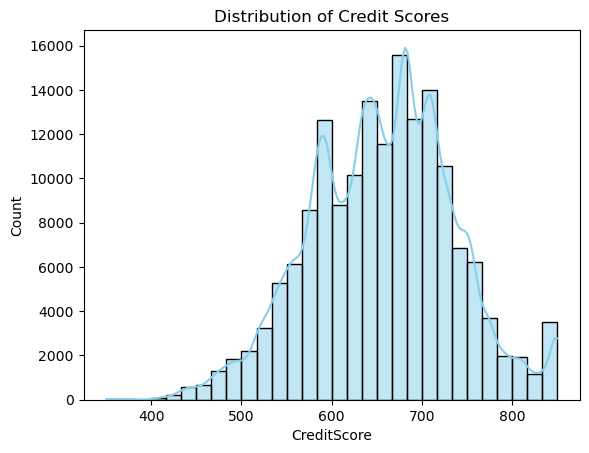

In [16]:
fig, axs = plt.subplots(1, 1)
sns.histplot(train_data['CreditScore'], bins=30, ax=axs, kde=True, color='skyblue')
axs.set_title('Distribution of Credit Scores')
plt.show()

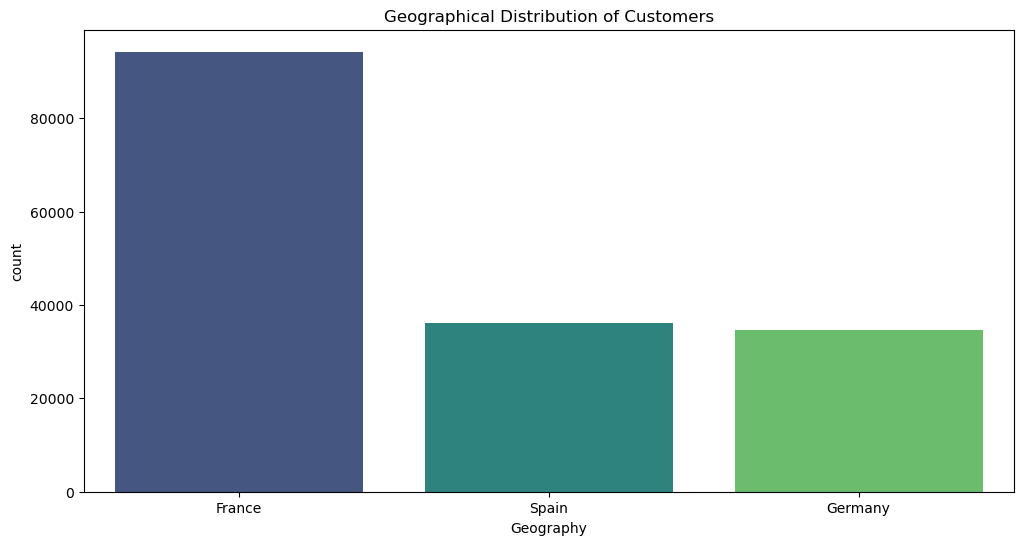

In [17]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='Geography', data=train_data, ax=ax, palette='viridis', hue='Geography', legend=False)
ax.set_title('Geographical Distribution of Customers')
plt.show()

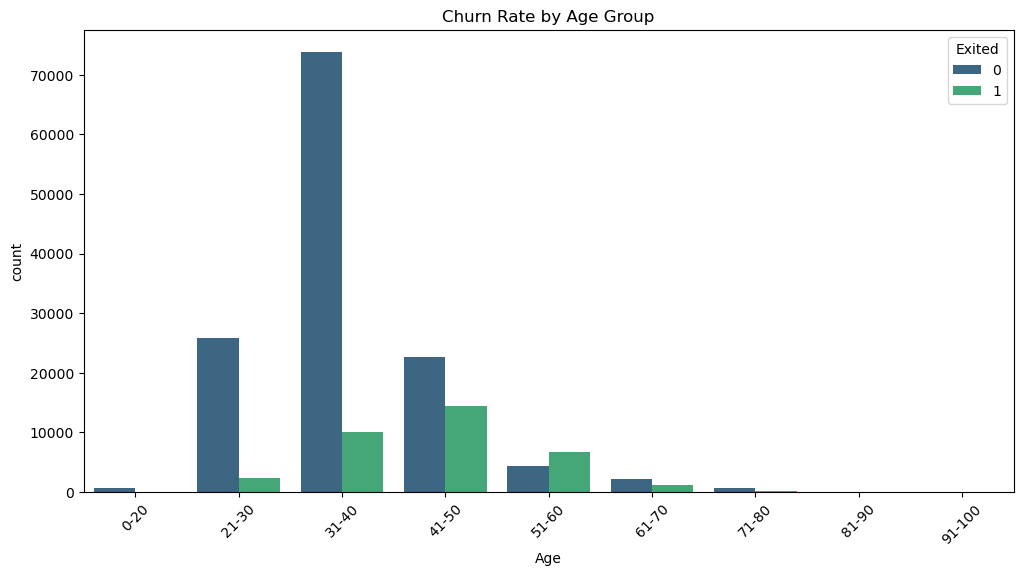

In [18]:
age_groups = pd.cut(train_data['Age'], bins=[0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                    labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])

fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x=age_groups, hue=train_data['Exited'], ax=ax, palette='viridis')
ax.set_title('Churn Rate by Age Group')
ax.tick_params(axis='x', rotation=45)

plt.show()

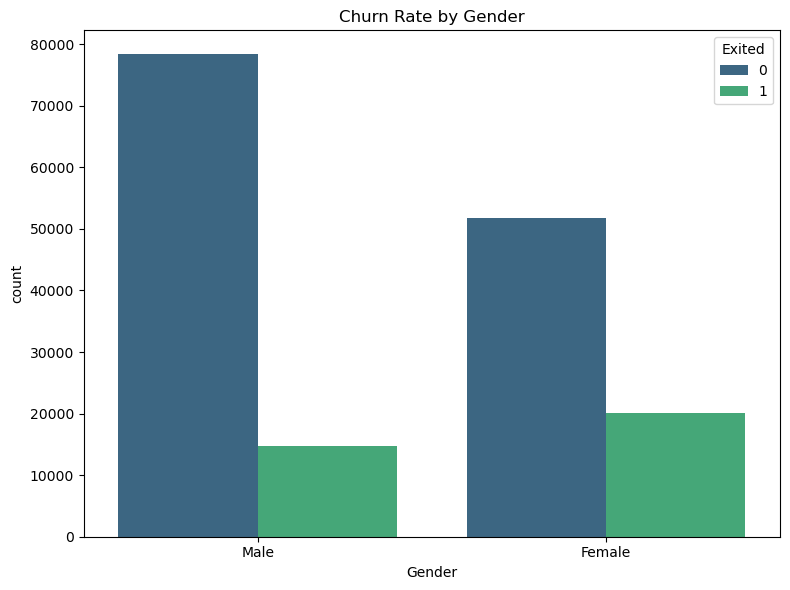

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.countplot(x='Gender', hue='Exited', data=train_data, ax=ax, palette='viridis')
ax.set_title('Churn Rate by Gender')
plt.tight_layout()
plt.show()

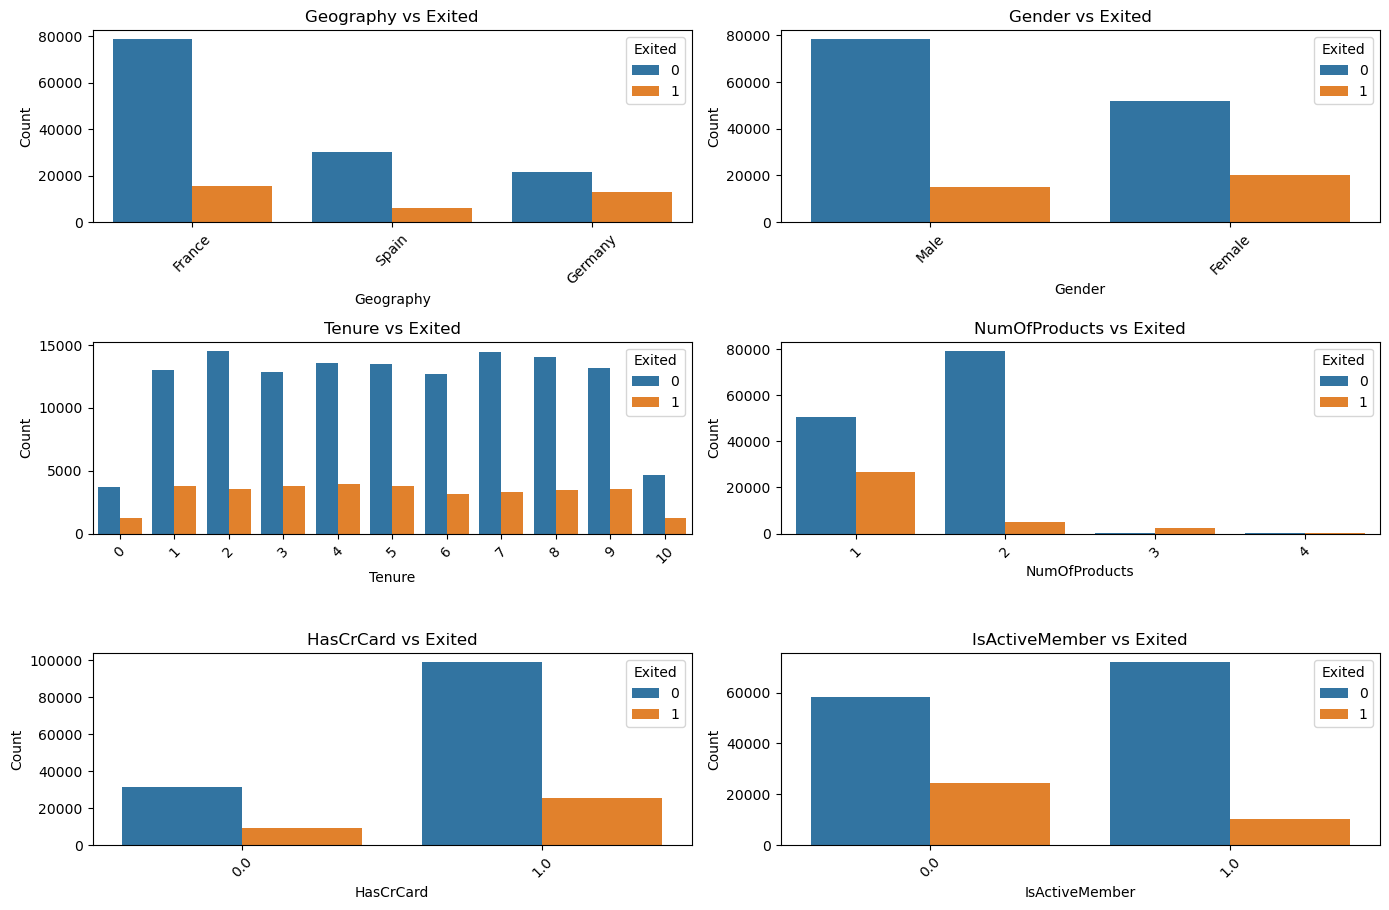

In [20]:
to_plot = ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(14, len(to_plot) * 3))

for i, col in enumerate(to_plot):
    plt.subplot(len(to_plot), 2, i + 1)
    sns.countplot(x=col, hue='Exited', data=train_data)
    plt.title(f"{col} vs Exited")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

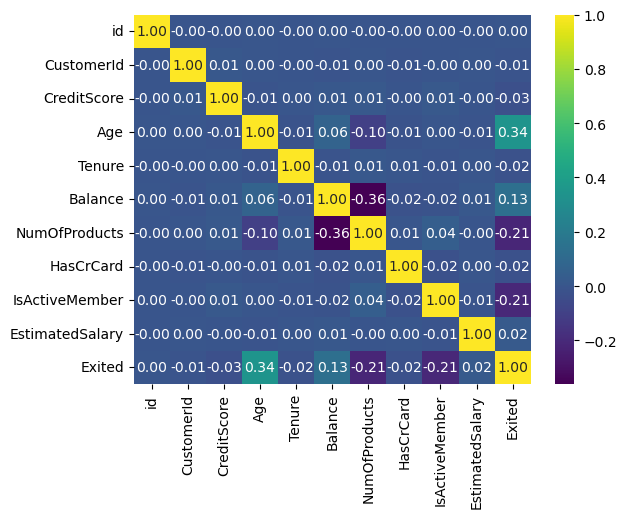

In [21]:
corr = train_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='viridis')

# Splitting data

In [22]:
train_df = train_data.copy()
test_df = test_data.copy()

In [23]:
train_df = train_df.drop(['id', 'CustomerId', 'Surname'], axis=1)

## Encode categorical columns

In [24]:
train_df = pd.get_dummies(train_df, columns=['Geography', 'Gender'], drop_first=True, dtype=int)

In [25]:
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,1,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0,0,0,1
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0,0,0,1
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,1,0


In [28]:
train_df['HasCrCard'] = train_df['HasCrCard'].astype(int)
train_df['IsActiveMember'] = train_df['IsActiveMember'].astype(int)

In [29]:
train_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1,0,181449.97,0,0,0,1
1,627,33.0,1,0.00,2,1,1,49503.50,0,0,0,1
2,678,40.0,10,0.00,2,1,0,184866.69,0,0,0,1
3,581,34.0,2,148882.54,1,1,1,84560.88,0,0,0,1
4,716,33.0,5,0.00,2,1,1,15068.83,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1,1,131834.75,0,0,1,0
165030,792,35.0,3,0.00,1,0,0,131834.45,0,0,0,1
165031,565,31.0,5,0.00,1,1,1,127429.56,0,0,0,1
165032,554,30.0,7,161533.00,1,0,1,71173.03,0,0,1,0


In [30]:
X = train_df.drop(['Exited'], axis=1)
y = train_df['Exited']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)